# __Should you find a job in North America or Europe?__

### __Business Understanding__

For this project, I was interested in using Stack Overflow survey data from 2019 to better understand:

 - As a developer, should I go to work in North America (e.g. America, Canada) or in Western Europe (e.g. France, Spain, Germany, Italy etc.)? 
 - What is the salary difference in North America and in Western Europe?
 - How are the programmers satisfying about their career between these two sides of the environment? 
 - Are there more job opportunities in the N.A. than that in Western Europe? 
 - What are the work hour differences in N. America and in Western Europe? 


### __Data Gathering__

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

First, we need to have a general view to our data. We need to know what kind of developer they are and their geographical location. 

Additionally, we should have a quick look on their employment status, how they think about thier salary and career satisfaction.

In [5]:
#Import and read the data
df = pd.read_csv('./developer_survey_2019/survey_results_public.csv')
schema = pd.read_csv('./developer_survey_2019/survey_results_schema.csv')

### __Data Assessment__

In [6]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [7]:
schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open sour...


In [8]:
df.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
Respondent                88883 non-null int64
MainBranch                88331 non-null object
Hobbyist                  88883 non-null object
OpenSourcer               88883 non-null object
OpenSource                86842 non-null object
Employment                87181 non-null object
Country                   88751 non-null object
Student                   87014 non-null object
EdLevel                   86390 non-null object
UndergradMajor            75614 non-null object
EduOther                  84260 non-null object
OrgSize                   71791 non-null object
DevType                   81335 non-null object
YearsCode                 87938 non-null object
Age1stCode                87634 non-null object
YearsCodePro              74331 non-null object
CareerSat                 72847 non-null object
JobSat                    70988 non-null object
MgrIdiot                  61

In [31]:
schema.info

<bound method DataFrame.info of             Column                                       QuestionText
0       Respondent  Randomized respondent ID number (not in order ...
1       MainBranch  Which of the following options best describes ...
2         Hobbyist                            Do you code as a hobby?
3      OpenSourcer        How often do you contribute to open source?
4       OpenSource  How do you feel about the quality of open sour...
5       Employment  Which of the following best describes your cur...
6          Country          In which country do you currently reside?
7          Student  Are you currently enrolled in a formal, degree...
8          EdLevel  Which of the following best describes the high...
9   UndergradMajor  What was your main or most important field of ...
10        EduOther  Which of the following types of non-degree edu...
11         OrgSize  Approximately how many people are employed by ...
12         DevType  Which of the following describe you? P

**Size of the dataset**

In [10]:
num_rows = df.shape[0]
num_cols = df.shape[1]
print (num_rows)
print (num_cols)

88883
85


In [11]:
#Check columns with non-missing values
df.columns[df.isnull().mean()==0]

Index(['Respondent', 'Hobbyist', 'OpenSourcer'], dtype='object')

In [12]:
# Data Understanding
def display_bar_chart(df, column, title): 
    '''
    
    Display a bar chart with a title 
    
    Parameters: 
    df: a dataframe 
    column: the column we want to show 
    title: title of the chart 
    
    Returns: 
    None
    
    '''
    
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);


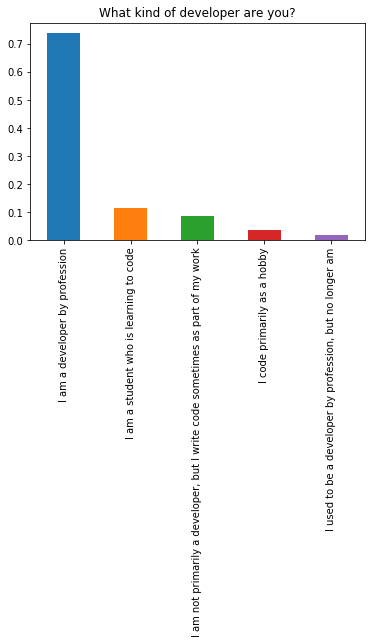

In [13]:
# Provide a pandas series of the counts for each Professional status 
display_bar_chart(df, "MainBranch", 'What kind of developer are you?')

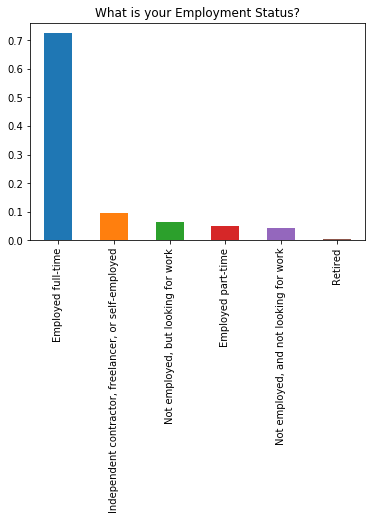

In [14]:
# Provide a pandas series of the counts for each employment status
display_bar_chart(df, "Employment", 'What is your Employment Status?')

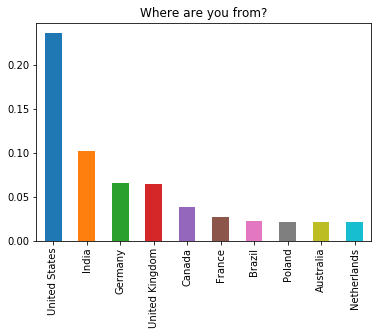

In [15]:
# Provide a pandas series of the counts for each country 
display_bar_chart(df, 'Country', 'Where are you from?')

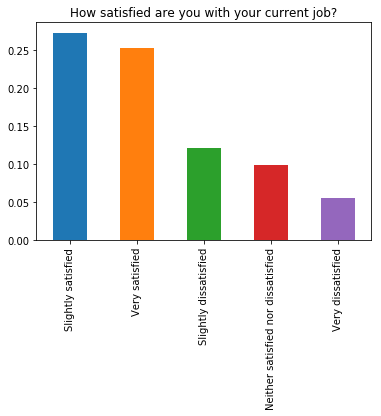

In [16]:
# Provide a pandas series of the counts for job satisfaction 
display_bar_chart(df, "JobSat", 'How satisfied are you with your current job?')

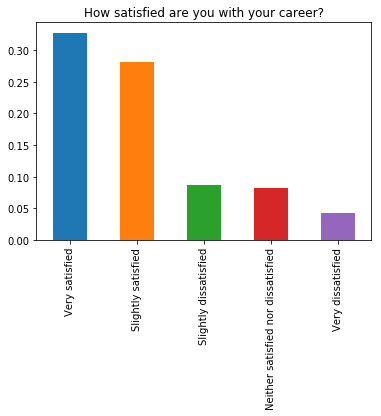

In [17]:
# Provide a pandas series of the counts for career satisfaction 
display_bar_chart(df, "CareerSat", 'How satisfied are you with your career?')

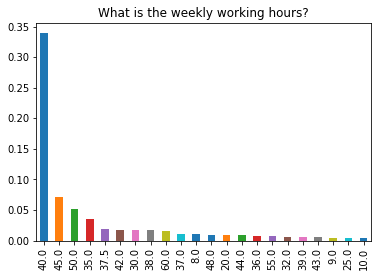

In [18]:
# Provide a pandas series of the counts for each work hours per week 
display_bar_chart(df, "WorkWeekHrs", "What is the weekly working hours?")

### __Data Cleaning__

Regarding the categorical variable "Country", we seperate them into three subgroups: W.Europe (western Europe), N.America, and other.
    

In [19]:
def cat_country(df): 
    
    '''
    Return a dataframe with country seperated into Western Europe and North America
    
    Parameters: 
    df: the raw data dataframe (stack overflow 2019 survey)
    
    Returns: 
    df: a dataframe with a new column W.Europe or N.America
    
    '''
    Western_Europe = ['Belgium','France','Ireland','Luxembourg','Monaco','Netherlands','United Kingdom','Spain','Portugal','Italy','Vatiacn City','Switzerland','Germany','Austria']
    North_America = ['Canada', 'United States']
    
    # Add a new catogory seperating countries to Western_Europe, North_America or Other
    df['west_eu_or_n.a.'] = df['Country'].apply(lambda x: 'western_europe' if x in Western_Europe else ('N.A.' if x in North_America else 'other'))
    
    return df 

Selection of a list of some useful columns for futher analysis

 - Country: Country they are living 
 - YearsCode: Years they are coding (including education) 
 - Employment: Their employment status 
 - ConvertedComp: their salary (converted in USD based on 2019-02-01 currency rate, 50weeks/12months/year)
 - JobSat & CareerSat: How much are they satisfied their job/career 
 - JobSeek: their job-seeking status 
 
In this exericse, we focus mainly on employed full-time professional developer. 

In [20]:
def data_prep(df): 
    '''
    Return relevant/useful columns with specified query conditions
    
    Parameters: 
    df: the raw data dataframe 
    
    Returns: 
    useful_df: a filtered dataframe with only selected columns
    
    '''
    #Select useful columns for further analysis 
    useful_cols = ['Country', 'YearsCode', 'Employment', 'ConvertedComp', 'JobSat', 'CareerSat', "WorkWeekHrs",'west_eu_or_n.a.', 'JobSeek']
    useful_df =pd.DataFrame(df.query("MainBranch == 'I am a developer by profession'and Employment == 'Employed full-time'"))[useful_cols]
    return useful_df
    

In [21]:
#Fetch some useful columns 

df = cat_country(df)
useful_df = data_prep(df)
useful_df.head()

,Country,YearsCode,Employment,ConvertedComp,JobSat,CareerSat,WorkWeekHrs,west_eu_or_n.a.,JobSeek
3,United States,3,Employed full-time,61000.0,Slightly satisfied,Very satisfied,80.0,N.A.,I am not interested in new job opportunities
4,Ukraine,16,Employed full-time,NaN,Slightly dissatisfied,Very dissatisfied,55.0,other,I am not interested in new job opportunities
8,New Zealand,12,Employed full-time,95179.0,Slightly satisfied,Slightly satisfied,32.0,other,"I’m not actively looking, but I am open to new..."
9,India,12,Employed full-time,13293.0,Slightly dissatisfied,Slightly dissatisfied,70.0,other,"I’m not actively looking, but I am open to new..."
12,United States,17,Employed full-time,90000.0,Very satisfied,Very satisfied,40.0,N.A.,I am not interested in new job opportunities


For categorical variables, i.e. career satisfaction, job satisfaction, we need to convert them to dummy variables to quantify the mean of their opinion. 

The following code is the dummy conversion mapping:

In [22]:
def dummy_careersat(df): 
    
    '''
    Convert career satisfactions to integer for mean calculaiton
    
    Parameters: 
    df: a dataframe that should be converted 
    
    Returns: 
    dataframe: a converted dummy dataframe with career satisfaction column become measurable
    
    '''
    satisfaction_mapping = {
        'Very dissatisfied': 1, 
        'Slightly dissatisfied': 2,
        'Neither satisfied nor dissatisfied': 3,
        'Slightly satisfied': 4,
        'Very satisfied': 5}
    
    df['CareerSat'] = df['CareerSat'].apply(lambda x: satisfaction_mapping[x])
    
    return df 

### __Data Modeling__

In [23]:
#Compare selected indicators between western europe and north america
useful_df = dummy_careersat(useful_df)
comparison = useful_df.groupby(['west_eu_or_n.a.', 'YearsCode']).mean()
comparison

ConvertedComp  CareerSat  WorkWeekHrs
west_eu_or_n.a. YearsCode                                                
N.A.            1                   226506.184783   4.365385    41.860825
                10                  236752.632525   4.194795    42.300126
                11                  219431.303030   4.356674    41.367081
                12                  237278.469065   4.197007    41.913770
                13                  228585.368687   4.257778    41.947430
                14                  231557.706019   4.226994    41.774678
                15                  278765.691989   4.216184    41.896452
                16                  225991.207831   4.290576    41.977961
                17                  234840.340000   4.285714    42.570336
                18                  241769.582734   4.224319    42.077778
                19                  285587.367041   4.165017    42.223958
                2                   228759.651724   4.483180    40.670128
                20                  255722.261337   4.207645    42.545874
                21                  230306.645320   4.162996    42.176136
                22                  273458.446735   4.143302    42.735390
                23                  250988.467337   4.277551    43.212329
                24                  208203.344156   4.281081    42.897727
                25                  268779.389646   4.122538    43.625882
                26                  227317.673267   4.226087    42.462963
                27                  216588.255319   4.235849    43.723301
                28                  274905.045872   4.367188    42.871901
                29                  172714.346939   4.483871    42.646552
                3                   201229.067245   4.353293    41.325309
                30                  281077.175719   4.254011    43.994302
                31                  340721.209302   4.021277    42.712766
                32                  235822.528736   4.101010    44.154639
                33                  188298.436620   4.074468    44.500000
                34                  243457.914286   4.011111    44.189655
                35                  221449.473171   4.202479    42.564444
                36                  201301.513514   4.230769    43.141176
...                                           ...        ...          ...
western_europe  29                  148577.820513   4.019608    41.382979
                3                    89413.694245   4.043344    41.487013
                30                  141793.030303   3.700658    40.034672
                31                  144467.864865   3.795455    41.268293
                32                  179715.000000   4.126214    41.552632
                33                  157681.137931   4.162162    39.628571
                34                  159522.395349   3.879310    41.527778
                35                  166434.734848   3.872928    40.688596
                36                  178854.630435   3.846154    40.093220
                37                  221714.303571   3.723077    39.790323
                38                  196297.021277   4.000000    40.683962
                39                  221753.578947   4.000000    42.045455
                4                    83099.752577   4.049041    39.558904
                40                  185309.307692   4.043478    45.634921
                41                  155987.727273   3.916667    42.477273
                42                   87001.909091   4.166667    40.590909
                43                  607600.500000   4.285714    39.333333
                44                   97690.800000   4.500000    41.333333
                45                  104850.571429   3.909091    47.450000
                46                   48086.000000   3.000000    40.000000
                47                  130847.000000   5.000000    45.000000
                49                  9420

### Data Visulization

Display results and discuss about it 
    

In [26]:
#Plot salary comparison between Western Europe and N.America
comparison_graph = useful_df.sort_values(by = 'YearsCode')
comparison_graph.set_index ('YearsCode', inplace=True)

Text(0,0.5,'Average Salary')

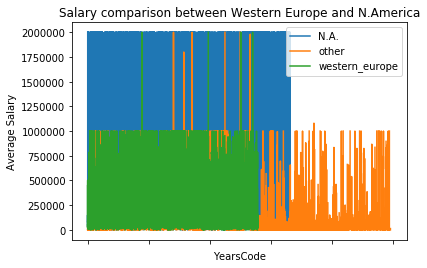

In [27]:
comparison_graph.groupby('west_eu_or_n.a.')['ConvertedComp'].plot(legend=True)
plt.title('Salary comparison between Western Europe and N.America'); 
plt.xlabel('YearsCode')
plt.ylabel('Average Salary')

In [28]:
comparison_graph.groupby('west_eu_or_n.a.').mean().CareerSat

west_eu_or_n.a.
N.A.              4.248127
other             3.818185
western_europe    3.945292
Name: CareerSat, dtype: float64

In [29]:
comparison_graph.groupby('west_eu_or_n.a.').mean().WorkWeekHrs

west_eu_or_n.a.
N.A.              42.141911
other             43.680537
western_europe    41.903783
Name: WorkWeekHrs, dtype: float64

In [30]:
comparison_graph.groupby('west_eu_or_n.a.').mean().ConvertedComp/50

west_eu_or_n.a.
N.A.              4821.509954
other             1058.323893
western_europe    2463.378446
Name: ConvertedComp, dtype: float64

Here, we can see that N.American programmers have a much higher satisfaction on career than Western European programmers;  
additionally, the mean weekly salary is significantly higher (double folds higher) in N.A. than that of Western Europe, even though the workweekhours in Western European is slightly lower than those in N.America.

Text(0,0.5,'Average Weekly Salary')

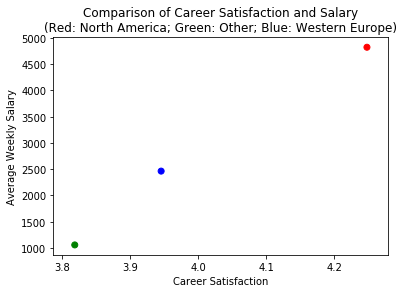

In [31]:
# Plot of comparison of career satisfaction and salary between W.Europe and N.America

plt.scatter(comparison_graph.groupby('west_eu_or_n.a.').mean().CareerSat, 
            comparison_graph.groupby('west_eu_or_n.a.').mean().ConvertedComp/50, 
            c=['red', 'green', 'blue'])
plt.title('Comparison of Career Satisfaction and Salary\n(Red: North America; Green: Other; Blue: Western Europe)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Average Weekly Salary')

### Conclusion

 - We found that the Western European programmers have significant less salary than those in
    N.America regardless of the years of coding experience.
 - We found that the career satisfaction of N.American programmers are higher than those in the Western Europe. 
 - In terms of weekly working hours, we found programmers in Western Europe has slightly lower working hours than those of in N. America. 